<a href="https://colab.research.google.com/github/2Beneficence2/DL23/blob/main/DL/NLP01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📙Natural Language Processing 1** (May 10, May 17)

[Online Reference](https://realpython.com/nltk-nlp-python/)

May 17: todo

+ Create a new Colab page to do the following. (Name the file as you can recognize)
+ Find online story material (Aesop fable)
+ Choose two stories with very different characters
+ Make 2 wordcloud images (save them on the desktop)
+ Save the colab page on your own github repository

# **⭐0. Preview: Wordcloud**
[text file](https://raw.githubusercontent.com/MK316/Class_Spring2022/main/RE.ch05.txt)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


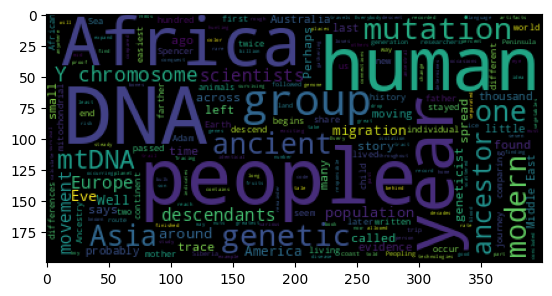

In [1]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import os
import matplotlib.pyplot as plt
nltk.download("punkt")

url = "https://raw.githubusercontent.com/MK316/Class_Spring2022/main/RE.ch05.txt"
os.system("curl " + url + " > RE.ch05.txt")
#@markdown 🌀 read a text file in the server: as _text_
file = open("RE.ch05.txt")
text = file.read().replace("\n", " ")
file.close()

wc = WordCloud().generate(text) 
plt.imshow(wc)

[nltk text](https://realpython.com/nltk-nlp-python/)

Please paste your text here: The Mice once called a meeting to decide on a plan to free themselves of their enemy, the Cat. At least they wished to find some way of knowing when she was coming, so they might have time to run away. Indeed, something had to be done, for they lived in such constant fear of her claws that they hardly dared stir from their dens by night or day.  Many plans were discussed, but none of them was thought good enough. At last a very young Mouse got up and said:  "I have a plan that seems very simple, but I know it will be successful.  All we have to do is to hang a bell about the Cat's neck. When we hear the bell ringing we will know immediately that our enemy is coming."  All the Mice were much surprised that they had not thought of such a plan before. But in the midst of the rejoicing over their good fortune, an old Mouse arose and said:  "I will say that the plan of the young Mouse is very good. But let me ask one question: Who will bell the Cat?"  It is one 

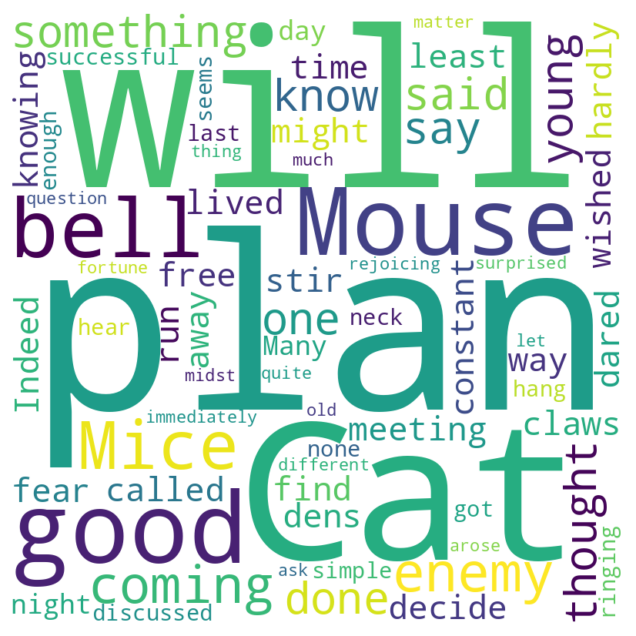

In [2]:
#@markdown Wordcloud with your own text: Paste your text

#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Getting text from the user
user_text = input("Please paste your text here: ")


wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=800,
    max_words=100
).generate(user_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
# Save the word cloud image
# 파일 업로드 하는 방법 꼭 숙지하기
# 구글 mount가 뭔가
image_path = 'wordcloud.png'  # Path to save the image
plt.savefig(image_path)
print(f"Word cloud image saved as {image_path}")


Word cloud image saved as wordcloud.png


<Figure size 640x480 with 0 Axes>

# **⭐1. Tokenize  by words or sentences**
####text를 (단어나 문장 단위 같이)작은 단위로 나누는 것 = Tokenize (정의 알기)
#중요 KEYWORD

+ Tokenize by word
+ Tokenize by sentence

In [6]:
example_string = "My name is Sarah. I live in a big city. I like to read books and play with my cat."

In [9]:
set1 = example_string.split()
print(set1)
##split함수에 대해 (이미 공부한 부분)

['My', 'name', 'is', 'Sarah.', 'I', 'live', 'in', 'a', 'big', 'city.', 'I', 'like', 'to', 'read', 'books', 'and', 'play', 'with', 'my', 'cat.']


In [11]:
set2 = example_string.split(".")
set2
#'.' 뒤의 empty string도 포함시켜야 함
#empty string, list 공부

['My name is Sarah',
 ' I live in a big city',
 ' I like to read books and play with my cat',
 '']

In [14]:
# Strip()
#불필요한 space를 remove

set3 = [s.strip() for s in set2]
set3

['My name is Sarah',
 'I live in a big city',
 'I like to read books and play with my cat',
 '']

In [13]:
# Remove empty string in a list
#!=는 부정문을 의미, ==는 긍정문을 의미
set4 = [x for x in set3 if x != ""]
set4

['My name is Sarah',
 'I live in a big city',
 'I like to read books and play with my cat']

In [16]:
set5 = [len(t) for t in set4]
set5
#수업시간에 직접 코딩 연습한 부분 
# if를 활용하여 조건도 붙일 수 있음

[16, 20, 41]

## **Using {nltk} library**


In [17]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [20]:
slist = sent_tokenize(example_string)
slist

'I live in a big city.'

[sample text to copy](https://raw.githubusercontent.com/MK316/Class_Spring2022/main/RE.ch05.txt)

In [24]:
mytext=input("Paste text: ")
slist1 = sent_tokenize(mytext)
slist1

Paste text: The Mice once called a meeting to decide on a plan to free themselves of their enemy, the Cat. At least they wished to find some way of knowing when she was coming, so they might have time to run away. Indeed, something had to be done, for they lived in such constant fear of her claws that they hardly dared stir from their dens by night or day.  Many plans were discussed, but none of them was thought good enough. At last a very young Mouse got up and said:  "I have a plan that seems very simple, but I know it will be successful.  All we have to do is to hang a bell about the Cat's neck. When we hear the bell ringing we will know immediately that our enemy is coming."  All the Mice were much surprised that they had not thought of such a plan before. But in the midst of the rejoicing over their good fortune, an old Mouse arose and said:  "I will say that the plan of the young Mouse is very good. But let me ask one question: Who will bell the Cat?"


['The Mice once called a meeting to decide on a plan to free themselves of their enemy, the Cat.',
 'At least they wished to find some way of knowing when she was coming, so they might have time to run away.',
 'Indeed, something had to be done, for they lived in such constant fear of her claws that they hardly dared stir from their dens by night or day.',
 'Many plans were discussed, but none of them was thought good enough.',
 'At last a very young Mouse got up and said:  "I have a plan that seems very simple, but I know it will be successful.',
 "All we have to do is to hang a bell about the Cat's neck.",
 'When we hear the bell ringing we will know immediately that our enemy is coming."',
 'All the Mice were much surprised that they had not thought of such a plan before.',
 'But in the midst of the rejoicing over their good fortune, an old Mouse arose and said:  "I will say that the plan of the young Mouse is very good.',
 'But let me ask one question: Who will bell the Cat?"']

In [25]:
len(slist1)

10

In [27]:
mywords = word_tokenize(mytext)
print(len(mywords))
mywords[:10]
#text에서 10개의 단어만 보여주는 것 
#5/17일 수업진도

217


['The', 'Mice', 'once', 'called', 'a', 'meeting', 'to', 'decide', 'on', 'a']

# **⭐2. Filtering stopwords**

**Stopwords**

Stop words are words that you want to ignore, so you filter them out of your text when you’re processing it. Very common words like 'in', 'is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text in and of themselves.

Here’s how to import the relevant parts of NLTK in order to filter out stop words:

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sample = "Sir, I protest. I am not a merry man!"
s1 = word_tokenize(sample); s1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
# string.casefold(): to all lower case so that we can compare strings

w1 = "Mary"
w2 = "susan"
w1.casefold()

'mary'

In [ ]:
# Remove punctuations and stopwords

filtered_list = []

for word in s1:
   if (word.casefold() not in stop_words) & (len(word)>1):
        filtered_list.append(word)

filtered_list

['Sir', 'protest', 'merry', 'man']

Test wordclouds with / without stopwords 

[sample text](https://raw.githubusercontent.com/MK316/Spring2023/main/DL/story1.txt)

In [ ]:
#@markdown Wordcloud with your own text: Paste your text

#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Getting text from the user
user_text = input("Please paste your text here: ")


wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=800,
    max_words=100
).generate(user_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
text1 = """
Once upon a time, there was a kind and adventurous boy named Jack. Jack loved exploring and going on exciting adventures. One day, Jack decided to go on a hike in the nearby forest. As he was walking, he heard a soft meowing sound.

Jack followed the sound and found a small, black kitten. The kitten was scared and alone. Jack picked up the kitten and carried her in his arms. He decided to take her home and give her a warm place to sleep and plenty of food to eat.

Jack named the kitten Luna, and she quickly became his best friend. They did everything together, playing in the park, exploring the woods, and snuggling up together to watch movies at night.

One day, Jack and Luna went on a hike and got lost. They wandered deeper and deeper into the woods, but they couldn't find their way back. Jack started to worry, but Luna stayed by his side, meowing softly to comfort him.

As they continued to wander, they stumbled upon a clearing where an old man was sitting by a campfire. The old man welcomed them and gave them food and water. Jack explained that they were lost, and the old man offered to help them find their way home.

The old man took them on a journey through the woods, showing them which paths to take and which to avoid. Finally, they arrived back at Jack's house, safe and sound.

From that day forward, Jack and Luna never went on another adventure without the old man's guidance. They were grateful to have each other and to have made a new friend who could help them when they needed it most.
"""

In [ ]:
w1 = word_tokenize(text1)
stop_words = set(stopwords.words('english'))

w2 = [w for w in w1 if w.lower() not in stop_words and len(w) > 2]
w2

In [ ]:
additional_stopwords = {'one', 'day', 'upon'}

# Create a new set of stopwords that includes the default stopwords and the additional ones
stop_words = set(stopwords.words('english') + list(additional_stopwords))

In [ ]:
w1 = word_tokenize(text1)
stop_words = set(stopwords.words('english') + list(additional_stopwords))

w2 = [w for w in w1 if w.lower() not in stop_words and len(w) > 2]
w2

# Tagging Parts of Speech

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')

sentence = input("Type your sentence: ")
mywords = word_tokenize(sentence)
nltk.pos_tag(mywords)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Type your sentence: My friend is coming to my town.


[('My', 'PRP$'),
 ('friend', 'NN'),
 ('is', 'VBZ'),
 ('coming', 'VBG'),
 ('to', 'TO'),
 ('my', 'PRP$'),
 ('town', 'NN'),
 ('.', '.')]

In [ ]:
nltk.download('tagsets')
# nltk.help.upenn_tagset()

In [ ]:
nltk.download("book")

In [ ]:
from nltk.book import *

In [ ]:
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

[sample text](https://raw.githubusercontent.com/MK316/Class_Spring2022/main/RE.ch05.txt)

In [ ]:
import nltk

# Define some plain text
text = input("Paste your text: ")

# Tokenize the text into a list of words
tokens = nltk.word_tokenize(text)

# Create an nltk.Text object from the list of tokens
text_object = nltk.Text(tokens)

# Use the concordance method to find occurrences of the word "fox"
text_object.concordance("be")

Paste your text: The DNA trail Everybody loves a good story, and when it's finished, this may be the greatest one ever told. It begins in Africa with a group of people. There are perhaps just a few hundred, surviving by hunting animals and gathering fruits, vegetables, and nuts. It ends about 200,000 years later, with their seven billion descendants spread across the Earth.  In between is an exciting tale of survival, movement, isolation, and conquest, most of it occurring before recorded history. Who were those first modern people in Africa? What routes did they take when they left their home continent to expand into Europe and Asia? When and how did humans reach the Americas? For decades, the only proof was found in a small number of scattered bones and artifacts that our ancestors had left behind. In the past 20 years, however, DNA technologies have allowed scientists to find a record of ancient human migrations in the DNA of living people.  Tracing Ancestry in DNA.  "Every drop of 

# Frequency list (next lesson)